# DSN Free AI Classes in Every City 2025
##  The Excellent Store Challenge
### Solution by: `IHEANYI, FAVOUR CHISOM`

##Import the Libraries

In [2]:
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Modelling
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import mean_squared_error

from scipy.stats import randint, uniform

import torch

In [3]:
print(sklearn.__version__)

1.6.1


In [4]:
# Setup rendom seed
np.random.seed(42)

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Import and load the data

In [7]:
train = pd.read_csv('/content/drive/MyDrive/train.csv')
test = pd.read_csv('/content/drive/MyDrive/test.csv')
samp_sub = pd.read_csv('/content/drive/MyDrive/SampleSubmission.csv')

## Understanding the loaded data

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4990 entries, 0 to 4989
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Item_ID              4990 non-null   object 
 1   Store_ID             4990 non-null   object 
 2   Item_Store_ID        4990 non-null   object 
 3   Item_Weight          4188 non-null   float64
 4   Item_Sugar_Content   4990 non-null   object 
 5   Item_Visibility      4990 non-null   float64
 6   Item_Type            4990 non-null   object 
 7   Item_Price           4990 non-null   float64
 8   Store_Start_Year     4990 non-null   int64  
 9   Store_Size           3540 non-null   object 
 10  Store_Location_Type  4990 non-null   object 
 11  Store_Type           4990 non-null   object 
 12  Item_Store_Returns   4990 non-null   float64
dtypes: float64(4), int64(1), object(8)
memory usage: 506.9+ KB


In [9]:
train.describe()

,Item_Weight,Item_Visibility,Item_Price,Store_Start_Year,Item_Store_Returns
count,4188.000000,4990.000000,4990.000000,4990.000000,4990.000000
mean,12.908838,0.066916,391.803796,2004.783567,6103.520164
std,4.703256,0.053058,119.378259,8.283151,4447.333835
min,4.555000,0.000000,78.730000,1992.000000,83.230000
25%,8.767500,0.027273,307.890000,1994.000000,2757.660000
50%,12.600000,0.053564,393.860000,2006.000000,5374.675000
75%,17.100000,0.095358,465.067500,2011.000000,8522.240000
max,21.350000,0.328391,667.220000,2016.000000,32717.410000


## Exploratory Data Analysis (EDA)

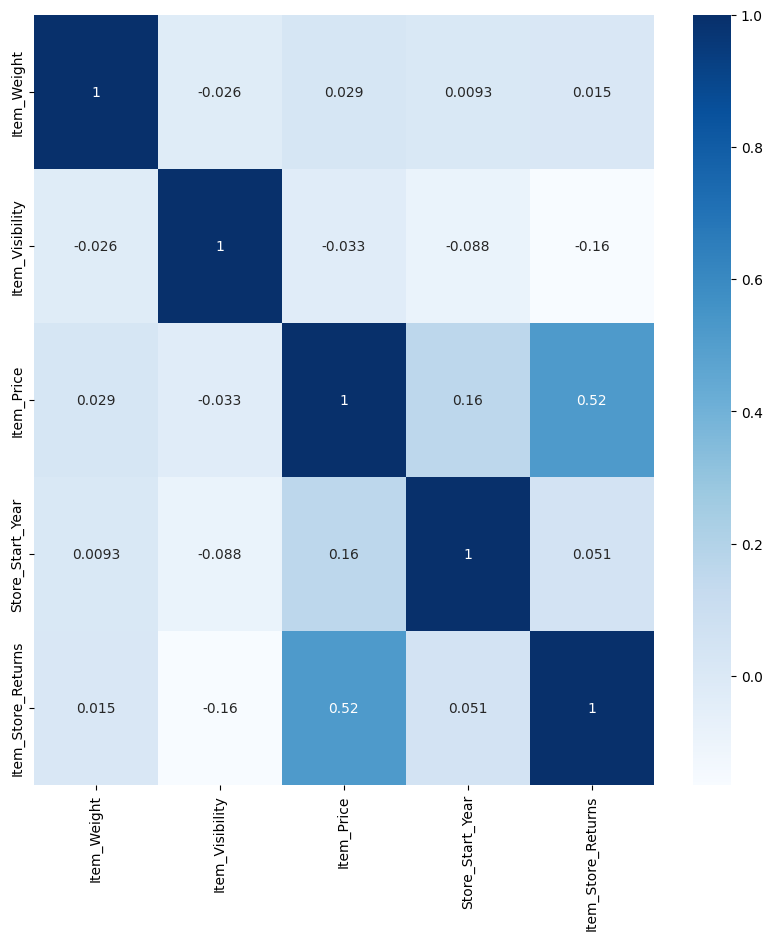

In [21]:
correlation = train.corr(numeric_only=True) # Calculate correlation only for numeric columns
plt.figure(figsize=(10,10))
sns.heatmap(correlation, annot=True, cmap=plt.cm.Blues)

plt.show()

## Building the Model

In [22]:
R = train.drop("Item_Store_ID", axis=1)
D = train["Item_Store_ID"]

In [25]:
data = pd.concat([R, test], sort=False)
data.head()

,Item_ID,Store_ID,Item_Weight,Item_Sugar_Content,Item_Visibility,Item_Type,Item_Price,Store_Start_Year,Store_Size,Store_Location_Type,Store_Type,Item_Store_Returns,Item_Store_ID
0,DRA12,BABATUNJI010,11.6,Low Sugar,0.068535,Soft Drinks,357.54,2005,NaN,Cluster 3,Grocery Store,709.08,NaN
1,DRA12,BABATUNJI013,11.6,Low Sugar,0.040912,Soft Drinks,355.79,1994,High,Cluster 3,Supermarket Type1,6381.69,NaN
2,DRA12,BABATUNJI017,11.6,Low Sugar,0.041178,Soft Drinks,350.79,2014,NaN,Cluster 2,Supermarket Type1,6381.69,NaN
3,DRA12,BABATUNJI018,11.6,Low Sugar,0.041113,Soft Drinks,355.04,2016,Medium,Cluster 3,Supermarket Type2,2127.23,NaN
4,DRA12,BABATUNJI035,11.6,Ultra Low Sugar,0.000000,Soft Drinks,354.79,2011,Small,Cluster 2,Supermarket Type1,2481.77,NaN


In [ ]:
#

In [14]:
X = train.dropna(subset=["Item_Store_Returns"], inplace=True)
y = train["Item_Store_Returns"]

In [ ]:
# Define different features and transformer pipeline

categorical_features = ["Item_ID", "Store_ID", "Item_Store_ID", "Item_Sugar_Content", "Item_Type", "Store_Size", "Store_Location_Type", "Store_Type"]
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', sklearn.preprocessing.OneHotEncoder(handle_unknown='ignore'))
])

item_weight_feature = ["Item_Weight"]
item_weight_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean'))
])

item_visibility_feature = ["Item_Visibility"]
item_visibility_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean'))
])

item_price_feature = ["Item_Price"]
item_price_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean'))
])

store_start_year_feature = ["Store_Start_Year"]
store_start_year_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean'))
])

item_price_feature = ["Item_Price"]
item_price_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean'))
])

# Setup preprocessing steps (fill missing values, then convert to numbers)

preprocessor = ColumnTransformer(transformers=[
    ('cat', categorical_transformer, categorical_features),
    ('item_weight', item_weight_transformer, item_weight_feature),
    ('item_visibility', item_visibility_transformer, item_visibility_feature),
    ('item_price', item_price_transformer, item_price_feature),
    ('store_start_year', store_start_year_transformer, store_start_year_feature)
])

# Creating a preprocessing and modelling pipeline
model = Pipeline(steps=[("preprocessor", preprocessor),
                        ("model", RandomForestRegressor())])

# Split the data
X = train.drop("Item_Store_Returns", axis=1)
y = train["Item_Store_Returns"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
model.fit(X_train, y_train)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
pipe_grid = {
    "preprocessor__item_weight__imputer__strategy": ["mean", "median"],
    "preprocessor__item_visibility__imputer__strategy": ["mean", "median"],
    "preprocessor__item_price__imputer__strategy": ["mean", "median"],
    "model__n_estimators": [100, 500],
    "model__max_depth": [None, 5],
    "model__max_features": ["sqrt"],
    "model__min_samples_split": [2, 4]
}

gs_model = GridSearchCV(model, pipe_grid, cv=5, verbose=2)
gs_model.fit(X_train, y_train)

In [ ]:
# Use neg RMSE for scoring
gs_model = GridSearchCV(
    model,
    pipe_grid,
    cv=5,
    verbose=2,
    scoring='neg_root_mean_squared_error',
    n_jobs=-1
)

# Fit model
gs_model.fit(X_train, y_train)

# Best RMSE (neg -> pos)
best_rmse = -gs_model.best_score_
print(f"Best CV RMSE: {best_rmse:.4f}")

# Optional: RMSE on hold-out set
y_pred = gs_model.predict(X_test)
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Test RMSE: {rmse_test:.4f}")

## Prediction on Test Data

In [ ]:
prediction = gs_model.predict(test)

# Create submission file
submission = pd.DataFrame({
    "Item_Store_ID": test["Item_Store_ID"],
    "Item_Store_Returns": prediction
})
submission.to_csv('/content/drive/MyDrive/my_DSN_hackathon_8.csv', index=False)

print("Model trained and submission file created successfully!")